In [66]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import rc
from sklearn import tree, datasets
from sklearn.model_selection import (cross_val_score, learning_curve, 
                                     ShuffleSplit)
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import Imputer
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

### Chargement de la base de données

In [2]:
%load_ext sql
%sql sqlite:///geoxilia.db

'Connected: @geoxilia.db'

In [3]:
%%sql
SELECT distinct(LITHO) FROM geoxilia_well
WHERE DESCRIPTION LIKE '%shale%'
OR DESCRIPTION LIKE '%Shale%'

 * sqlite:///geoxilia.db
Done.


LITHO
UHSM
LHSM
OXSH
MISH
BLAS
KLSG
VKSG
BLSG
OXSG
LAWS


In [4]:
%%sql
SELECT * FROM geoxilia_data 
WHERE litho != '*' 
AND well != '11/30-2'
AND well != 'A1'
limit 100;

 * sqlite:///geoxilia.db
Done.


DEPTH,GR,CAL,DCOR,DENS,DTC,DTS,PE,PHIN,RESD,RESM,RESS,RESMIC,SP,DEPTH_M,WELL,LITHO
2848.0,30.1875,,,,116.0,-9999.0,-9999.0,0.0,3.6055,3.5996,-9999.0,-9999.0,-44.6875,868.0704000000001,11/30A-A17,LCSD
2848.5,21.8125,,,,117.375,-9999.0,-9999.0,0.0,3.6602,3.2617,-9999.0,-9999.0,-42.9063,868.2228,11/30A-A17,LCSD
2849.0,21.875,,,,118.1875,-9999.0,-9999.0,0.0,3.6719,3.2266,-9999.0,-9999.0,-41.6875,868.3752000000001,11/30A-A17,LCSD
2849.5,17.1875,,,,114.5625,-9999.0,-9999.0,0.0,3.7285,3.1621,-9999.0,-9999.0,-40.9688,868.5276,11/30A-A17,LCSD
2850.0,17.9375,,,,112.5625,-9999.0,-9999.0,0.0,3.5488,3.2422,-9999.0,-9999.0,-39.7188,868.6800000000001,11/30A-A17,LCSD
2850.5,17.2031,,,,109.75,-9999.0,-9999.0,0.0,3.377,3.3262,-9999.0,-9999.0,-39.1875,868.8324,11/30A-A17,LCSD
2851.0,19.3438,,,,110.1875,-9999.0,-9999.0,0.0,3.2109,3.4727,-9999.0,-9999.0,-38.2188,868.9848000000001,11/30A-A17,LCSD
2851.5,20.5156,,,,111.0,-9999.0,-9999.0,0.0,3.1504,3.4102,-9999.0,-9999.0,-37.4688,869.1372,11/30A-A17,LCSD
2852.0,19.5,,,,111.1875,-9999.0,-9999.0,0.0,3.0664,3.4922,-9999.0,-9999.0,-36.9375,869.2896000000001,11/30A-A17,LCSD
2852.5,19.2031,,,,111.375,-9999.0,-9999.0,0.0,3.0781,3.3711,-9999.0,-9999.0,-36.4688,869.442,11/30A-A17,LCSD


#### Chargement du fichier csv et traitement

In [5]:
argiles = 'UHSM|LHSM|OXSH|MISH|BLAS|KLSG|VKSG|BLSG|OXSG|LAWS|SLSH|OXSS'

In [6]:
data_geox = pd.read_csv('geoxilia_clean.csv', na_values = ['-9999.0', '-999.2500'])

In [7]:
data_geox = data_geox.drop(columns=['Unnamed: 0'])

In [8]:
data_geox.head()

,DEPTH,GR,CAL,DCOR,DENS,DTC,DTS,PE,PHIN,RESD,RESM,RESS,RESMIC,SP,DEPTH_M,WELL,LITHO
0,2848.0,30.1875,NaN,NaN,NaN,116.0000,NaN,NaN,0.0,3.6055,3.5996,NaN,NaN,-44.6875,868.0704,11/30A-A17,LCSD
1,2848.5,21.8125,NaN,NaN,NaN,117.3750,NaN,NaN,0.0,3.6602,3.2617,NaN,NaN,-42.9063,868.2228,11/30A-A17,LCSD
2,2849.0,21.8750,NaN,NaN,NaN,118.1875,NaN,NaN,0.0,3.6719,3.2266,NaN,NaN,-41.6875,868.3752,11/30A-A17,LCSD
3,2849.5,17.1875,NaN,NaN,NaN,114.5625,NaN,NaN,0.0,3.7285,3.1621,NaN,NaN,-40.9688,868.5276,11/30A-A17,LCSD
4,2850.0,17.9375,NaN,NaN,NaN,112.5625,NaN,NaN,0.0,3.5488,3.2422,NaN,NaN,-39.7188,868.6800,11/30A-A17,LCSD


In [9]:
data_geox['LITHO'][data_geox['LITHO'].str.contains('UHSM|LHSM|OXSH|MISH|BLAS|KLSG|VKSG|BLSG|OXSG|LAWS|SLSH|OXSS')] = 1
data_geox['LITHO'][data_geox['LITHO'] != 1] = 0
data_geox['LITHO'] = data_geox['LITHO'].astype('int')

/home/parfait/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/parfait/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
data_geox.head()

,DEPTH,GR,CAL,DCOR,DENS,DTC,DTS,PE,PHIN,RESD,RESM,RESS,RESMIC,SP,DEPTH_M,WELL,LITHO
0,2848.0,30.1875,NaN,NaN,NaN,116.0000,NaN,NaN,0.0,3.6055,3.5996,NaN,NaN,-44.6875,868.0704,11/30A-A17,0
1,2848.5,21.8125,NaN,NaN,NaN,117.3750,NaN,NaN,0.0,3.6602,3.2617,NaN,NaN,-42.9063,868.2228,11/30A-A17,0
2,2849.0,21.8750,NaN,NaN,NaN,118.1875,NaN,NaN,0.0,3.6719,3.2266,NaN,NaN,-41.6875,868.3752,11/30A-A17,0
3,2849.5,17.1875,NaN,NaN,NaN,114.5625,NaN,NaN,0.0,3.7285,3.1621,NaN,NaN,-40.9688,868.5276,11/30A-A17,0
4,2850.0,17.9375,NaN,NaN,NaN,112.5625,NaN,NaN,0.0,3.5488,3.2422,NaN,NaN,-39.7188,868.6800,11/30A-A17,0


In [11]:
columns = data_geox.columns

In [12]:
data_geox_ml = pd.DataFrame(data_geox,columns=columns)

In [13]:
data_geox_ml.head()

,DEPTH,GR,CAL,DCOR,DENS,DTC,DTS,PE,PHIN,RESD,RESM,RESS,RESMIC,SP,DEPTH_M,WELL,LITHO
0,2848.0,30.1875,NaN,NaN,NaN,116.0000,NaN,NaN,0.0,3.6055,3.5996,NaN,NaN,-44.6875,868.0704,11/30A-A17,0
1,2848.5,21.8125,NaN,NaN,NaN,117.3750,NaN,NaN,0.0,3.6602,3.2617,NaN,NaN,-42.9063,868.2228,11/30A-A17,0
2,2849.0,21.8750,NaN,NaN,NaN,118.1875,NaN,NaN,0.0,3.6719,3.2266,NaN,NaN,-41.6875,868.3752,11/30A-A17,0
3,2849.5,17.1875,NaN,NaN,NaN,114.5625,NaN,NaN,0.0,3.7285,3.1621,NaN,NaN,-40.9688,868.5276,11/30A-A17,0
4,2850.0,17.9375,NaN,NaN,NaN,112.5625,NaN,NaN,0.0,3.5488,3.2422,NaN,NaN,-39.7188,868.6800,11/30A-A17,0


In [14]:
data_geox_ml.dtypes

DEPTH      float64
GR         float64
CAL        float64
DCOR       float64
DENS       float64
DTC        float64
DTS        float64
PE         float64
PHIN       float64
RESD       float64
RESM       float64
RESS       float64
RESMIC     float64
SP         float64
DEPTH_M    float64
WELL        object
LITHO        int64
dtype: object

In [15]:
len(data_geox_ml)

260584

In [16]:
data_geox_ml_stat = pd.DataFrame(columns = ['champs', 'percent'])

In [17]:
for index, col in enumerate(columns[1:-3]):
    data_geox_ml_stat.loc[index, 'champs'] = col
    data_geox_ml_stat.loc[index, 'percent'] = round((((len(data_geox_ml) -  data_geox_ml[col].isna().sum())/(len(data_geox_ml)))*100), 2)

Text(0.5, 1.0, 'Pourcentage de valeurs non nulles par caractéristiques')

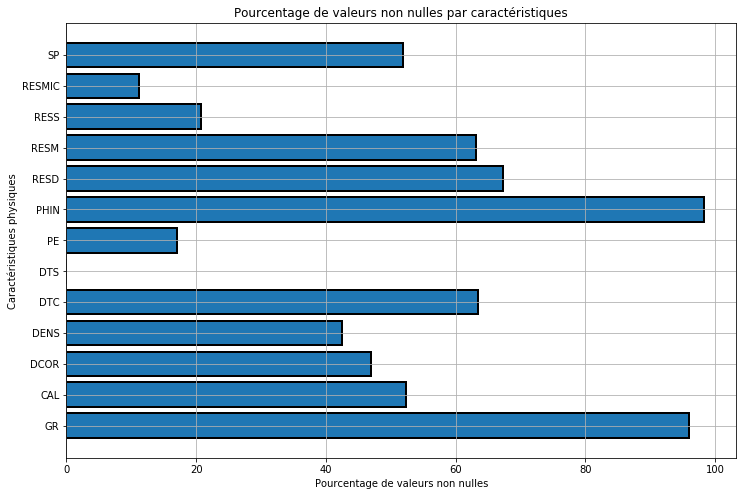

In [18]:
fig = plt.figure(figsize=(12, 8))
plt.barh(data_geox_ml_stat['champs'], data_geox_ml_stat['percent'], edgecolor='black', linewidth = 2)
xlabel = 'Pourcentage de valeurs non nulles'
ylabel = 'Caractéristiques physiques'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid()
plt.title("Pourcentage de valeurs non nulles par caractéristiques")

Text(0.5, 1.0, 'Pourcentage de valeurs non nulles par caractéristiques')

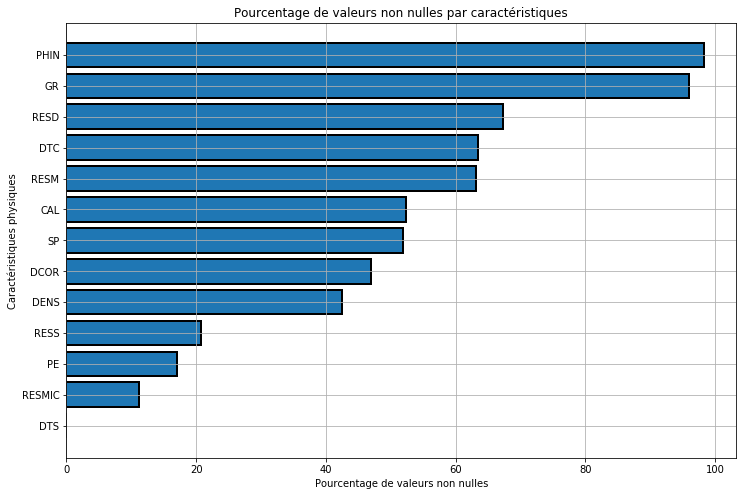

In [19]:
data_geox_ml_stat_sort = data_geox_ml_stat.sort_values(by ='percent')
fig = plt.figure(figsize=(12, 8))
plt.barh(data_geox_ml_stat_sort['champs'],data_geox_ml_stat_sort['percent'] , edgecolor='black', linewidth = 2)
xlabel = 'Pourcentage de valeurs non nulles'
ylabel = 'Caractéristiques physiques'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid()
plt.title("Pourcentage de valeurs non nulles par caractéristiques")

#### GR et PHIN

In [20]:
data_geox_ml_gr_phin = pd.DataFrame(data_geox_ml[(data_geox_ml['GR'].isna() != True) & (data_geox_ml['PHIN'].isna() != True)], columns=['GR', 'PHIN', 'LITHO'])

In [21]:
data_geox_ml_gr_phin.head()

,GR,PHIN,LITHO
0,30.1875,0.0,0
1,21.8125,0.0,0
2,21.8750,0.0,0
3,17.1875,0.0,0
4,17.9375,0.0,0


In [33]:
data_geox_ml_gr_phin.shape

(245822, 3)

In [25]:
data_geox_ml_gr_phin.groupby(['LITHO']).count()

,GR,PHIN
LITHO,,
0,157895,157895
1,87927,87927


In [26]:
rapp_1 = round((data_geox_ml_gr_phin.shape[0]/len(data_geox_ml)) * 100, 2)

In [34]:
data_geox_ml_all_2 = pd.DataFrame(data_geox_ml[(data_geox_ml['GR'].isna() != True) & (data_geox_ml['PHIN'].isna() != True) & (data_geox_ml['SP'].isna() != True) & (data_geox_ml['RESM'].isna() != True) & (data_geox_ml['RESD'].isna() != True) & (data_geox_ml['DTC'].isna() != True) & (data_geox_ml['DENS'].isna() != True) & (data_geox_ml['DCOR'].isna() != True) & (data_geox_ml['CAL'].isna() != True)], columns=['GR', 'PHIN', 'SP', 'RESM', 'RESD', 'DTC', 'DENS', 'DCOR','CAL','LITHO'])

In [35]:
data_geox_ml_all_2.groupby(['LITHO']).count()

,GR,PHIN,SP,RESM,RESD,DTC,DENS,DCOR,CAL
LITHO,,,,,,,,,
0,35752,35752,35752,35752,35752,35752,35752,35752,35752
1,8195,8195,8195,8195,8195,8195,8195,8195,8195


In [36]:
data_geox_ml_all_2.shape

(43947, 10)

In [37]:
rapp_2 = round ((data_geox_ml_all_2.shape[0]/len(data_geox_ml)) * 100, 2)

In [38]:
data_geox_ml_all_3 = pd.DataFrame(data_geox_ml[(data_geox_ml['GR'].isna() != True) & (data_geox_ml['PHIN'].isna() != True) & (data_geox_ml['SP'].isna() != True) & (data_geox_ml['RESM'].isna() != True) & (data_geox_ml['RESD'].isna() != True) & (data_geox_ml['DTC'].isna() != True) & (data_geox_ml['DENS'].isna() != True) & (data_geox_ml['DCOR'].isna() != True) & (data_geox_ml['CAL'].isna() != True) & (data_geox_ml['PE'].isna() != True) & (data_geox_ml['RESMIC'].isna() != True) & (data_geox_ml['RESS'].isna() != True)], columns=['GR', 'PHIN', 'SP', 'RESM', 'RESD', 'DTC', 'DENS', 'DCOR','CAL', 'PE', 'RESMIC', 'RESS','LITHO'])

In [39]:
data_geox_ml_all_3.shape

(0, 13)

In [42]:
rapp_3 = round((data_geox_ml_all_3.shape[0]/len(data_geox_ml))*100, 2)

Text(0.5, 1.0, 'Pourcentage de valeurs non nulles communes à plusieurs caractéristiques')

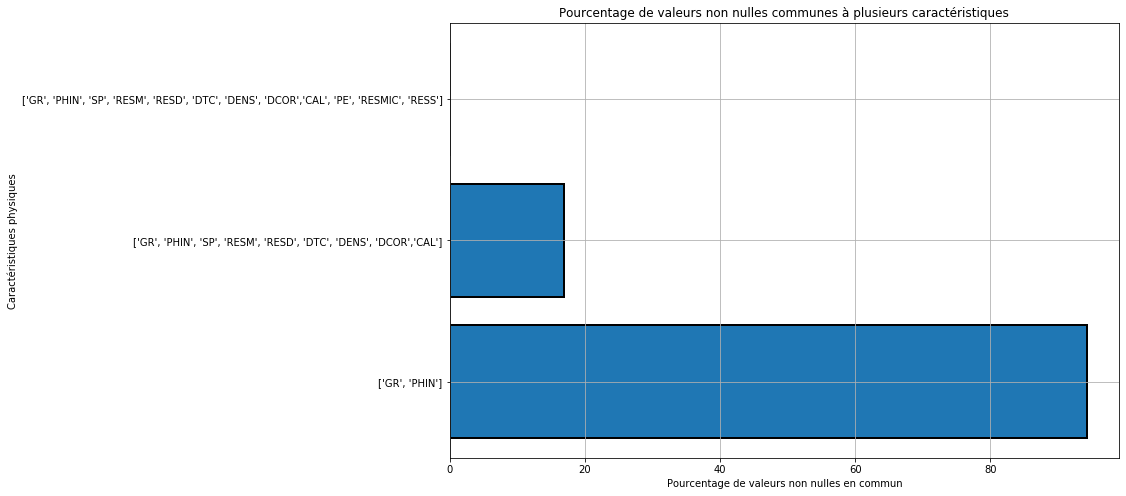

In [41]:
data_geox_ml_stat_sort = data_geox_ml_stat.sort_values(by ='percent')
fig = plt.figure(figsize=(12, 8))
plt.barh(["['GR', 'PHIN']", "['GR', 'PHIN', 'SP', 'RESM', 'RESD', 'DTC', 'DENS', 'DCOR','CAL']", "['GR', 'PHIN', 'SP', 'RESM', 'RESD', 'DTC', 'DENS', 'DCOR','CAL', 'PE', 'RESMIC', 'RESS']"],[rapp_1, rapp_2, rapp_3] , edgecolor='black', linewidth = 2)
xlabel = 'Pourcentage de valeurs non nulles en commun'
ylabel = 'Caractéristiques physiques'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid()
plt.title("Pourcentage de valeurs non nulles communes à plusieurs caractéristiques")

### 1-Première approche avec Decision Tree

#### Remplacement des valeurs NAN par la moyenne

In [69]:
data_geox_dt = pd.DataFrame(data_geox_ml)

In [70]:
data_geox_dt = data_geox_dt.drop(columns=['DTS'])

In [71]:
imp1 = Imputer(missing_values="NaN", strategy='mean')

/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [72]:
col_x = ['GR','CAL','DCOR','DENS','DTC','PE','PHIN','RESD','RESM','RESS','RESMIC','SP']

In [73]:
for val in col_x:
    imp1.fit(data_geox_dt[[val]])
    data_geox_dt[val]=pd.DataFrame(imp1.transform(data_geox_dt[[val]]))

In [74]:
data_geox_dt.head()

,DEPTH,GR,CAL,DCOR,DENS,DTC,PE,PHIN,RESD,RESM,RESS,RESMIC,SP,DEPTH_M,WELL,LITHO
0,2848.0,30.1875,9.878294,0.019448,2.442335,116.0000,3.981349,0.0,3.6055,3.5996,8.93046,10.414387,-44.6875,868.0704,11/30A-A17,0
1,2848.5,21.8125,9.878294,0.019448,2.442335,117.3750,3.981349,0.0,3.6602,3.2617,8.93046,10.414387,-42.9063,868.2228,11/30A-A17,0
2,2849.0,21.8750,9.878294,0.019448,2.442335,118.1875,3.981349,0.0,3.6719,3.2266,8.93046,10.414387,-41.6875,868.3752,11/30A-A17,0
3,2849.5,17.1875,9.878294,0.019448,2.442335,114.5625,3.981349,0.0,3.7285,3.1621,8.93046,10.414387,-40.9688,868.5276,11/30A-A17,0
4,2850.0,17.9375,9.878294,0.019448,2.442335,112.5625,3.981349,0.0,3.5488,3.2422,8.93046,10.414387,-39.7188,868.6800,11/30A-A17,0


In [75]:
data_geox_dt.groupby(['LITHO']).count()

,DEPTH,GR,CAL,DCOR,DENS,DTC,PE,PHIN,RESD,RESM,RESS,RESMIC,SP,DEPTH_M,WELL
LITHO,,,,,,,,,,,,,,,
0,165885,165885,165885,165885,165885,165885,165885,165885,165885,165885,165885,165885,165885,165885,165885
1,94699,94699,94699,94699,94699,94699,94699,94699,94699,94699,94699,94699,94699,94699,94699


In [76]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_geox_dt[col_x],data_geox_dt['LITHO'], test_size=0.2)

In [47]:
def decisionTree(X_train, X_test, y_train, y_test): 
    max_depth = 30
    trees = []
    scores_gini = []
    scores_ent = []
    for i in range(max_depth):
        decision_tree_1 = tree.DecisionTreeClassifier(max_depth=i+1, criterion='gini')
        decision_tree_1.fit(X_train, y_train)
        scores_gini.append(1 - decision_tree_1.score(X_test, y_test))

        decision_tree_2 = tree.DecisionTreeClassifier(max_depth=i+1, criterion='entropy')
        decision_tree_2.fit(X_train, y_train)
        scores_ent.append(1 - decision_tree_2.score(X_test, y_test))

    plt.figure(figsize=(12,8))
    plt.plot(np.arange(max_depth) + 1, scores_gini, label="Taux d'erreur avec impureté Gini") 
    plt.plot(np.arange(max_depth) + 1, scores_ent, label="Taux d'erreur avec entropy") 
    plt.xlabel('Depth max')
    plt.ylabel("Taux d'erreur")
    plt.title("Variation du taux d'erreur en fonction de la profondeur")
    plt.legend()
    plt.grid()
    plt.show()

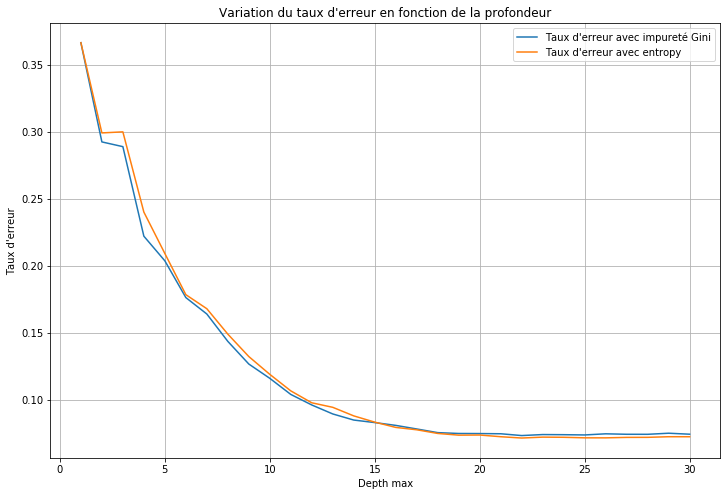

In [27]:
decisionTree(X_train, X_test, y_train, y_test)

#### Création de l'arbre de décision

In [28]:
decision_tree_1 =  tree.DecisionTreeClassifier(max_depth = 5, criterion='entropy')
decision_tree_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
dot_data = export_graphviz(decision_tree_1, out_file="tree-vis.dot", filled=True) 
os.system("dot -Tpdf tree-vis.dot -o tree-vis.pdf")
os.system("evince tree-vis.pdf")

0

#### Calcul de la mean_squared_error

In [30]:
y_test_predict = decision_tree_1.predict(X_test)
mse_mean = metrics.mean_squared_error(y_test, y_test_predict)
print("L'erreur quadratique moyenne est "+str(round(mse_mean,3)))

L'erreur quadratique moyenne est 0.209


### Décision Tree avec 2 variables explicatives GR et PHIN

In [79]:
col_x = ['GR','PHIN']
X_train_gr_phin, X_test_gr_phin, y_train_gr_phin, y_test_gr_phin = model_selection.train_test_split(data_geox_ml_gr_phin[col_x],data_geox_ml_gr_phin['LITHO'], test_size=0.2)

In [85]:
data_geox_ml_gr_phin.groupby(['LITHO']).count()

,GR,PHIN
LITHO,,
0,157895,157895
1,87927,87927


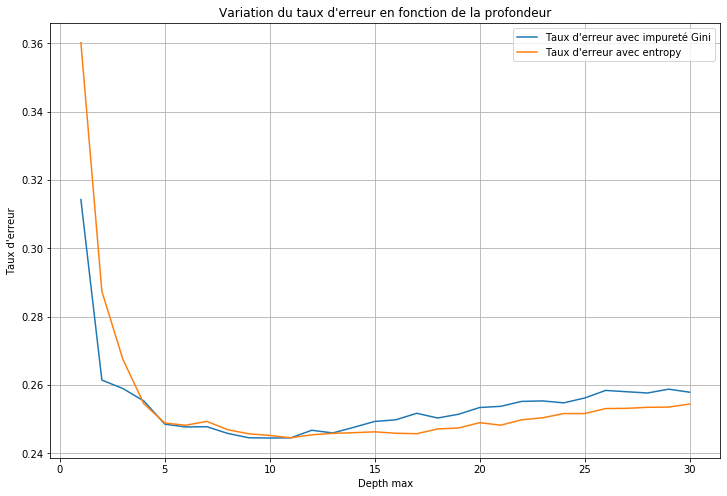

In [80]:
decisionTree(X_train_gr_phin, X_test_gr_phin, y_train_gr_phin, y_test_gr_phin)

### Décision Tree avec plusieurs variables explicatives 'GR', 'PHIN', 'SP', 'RESM', 'RESD', 'DTC', 'DENS', 'DCOR','CAL'

In [81]:
col_x = ['GR', 'PHIN', 'SP', 'RESM', 'RESD', 'DTC', 'DENS', 'DCOR','CAL']
X_train_all_2, X_test_all_2, y_train_all_2, y_test_all_2 = model_selection.train_test_split(data_geox_ml_all_2[col_x],data_geox_ml_all_2['LITHO'], test_size=0.2)

In [86]:
data_geox_ml_all_2.groupby(['LITHO']).count()

,GR,PHIN,SP,RESM,RESD,DTC,DENS,DCOR,CAL
LITHO,,,,,,,,,
0,35752,35752,35752,35752,35752,35752,35752,35752,35752
1,8195,8195,8195,8195,8195,8195,8195,8195,8195


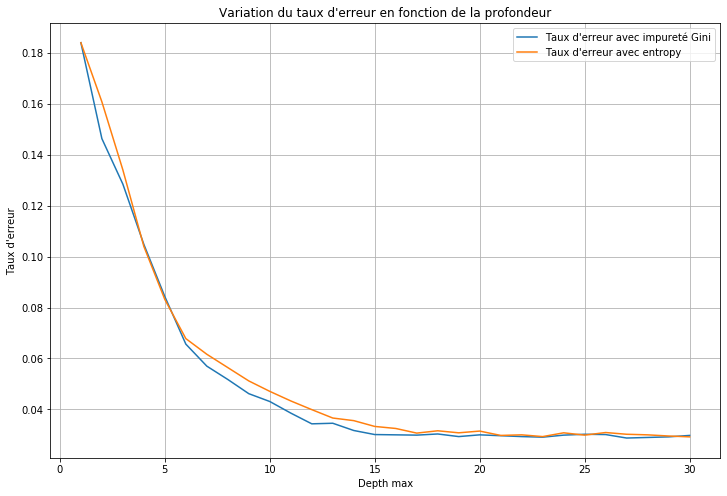

In [82]:
decisionTree(X_train_all_2, X_test_all_2, y_train_all_2, y_test_all_2)

In [84]:
data_geox_ml_all_2[data_geox_ml_all_2['LITHO'] == 1].count()

GR       8195
PHIN     8195
SP       8195
RESM     8195
RESD     8195
DTC      8195
DENS     8195
DCOR     8195
CAL      8195
LITHO    8195
dtype: int64

In [85]:
data_geox_ml_all_2[data_geox_ml_all_2['LITHO'] == 0].count()

GR       35752
PHIN     35752
SP       35752
RESM     35752
RESD     35752
DTC      35752
DENS     35752
DCOR     35752
CAL      35752
LITHO    35752
dtype: int64

#### Décision Tree ['GR','CAL','DCOR','DENS','PHIN','RESM'])

In [43]:
data_geox_ml_gr_resm = pd.DataFrame(data_geox_ml[(data_geox_ml['GR'].isna() != True) & (data_geox_ml['CAL'].isna() != True) & (data_geox_ml['DCOR'].isna() != True) & (data_geox_ml['DENS'].isna() != True) & (data_geox_ml['PHIN'].isna() != True) & (data_geox_ml['RESM'].isna() != True)], columns=['GR','CAL','DCOR','DENS','PHIN','RESM','LITHO'])

In [44]:
data_geox_ml_gr_resm.groupby(['LITHO']).count()

,GR,CAL,DCOR,DENS,PHIN,RESM
LITHO,,,,,,
0,65554,65554,65554,65554,65554,65554
1,14821,14821,14821,14821,14821,14821


In [45]:
col_x = ['GR','CAL','DCOR','DENS','PHIN','RESM']
X_train_gr_resm, X_test_gr_resm, y_train_gr_resm, y_test_gr_resm = model_selection.train_test_split(data_geox_ml_gr_resm[col_x],data_geox_ml_gr_resm['LITHO'], test_size=0.2)

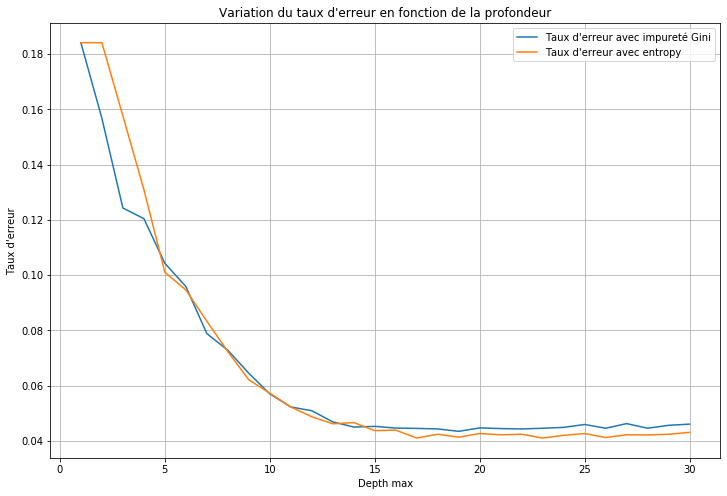

In [48]:
decisionTree(X_train_gr_resm, X_test_gr_resm, y_train_gr_resm, y_test_gr_resm)

#### Décision Tree ['GR','CAL','DCOR','DENS','PHIN','RESD',RESM,'SP']

In [50]:
data_geox_ml_gr_sp = pd.DataFrame(data_geox_ml[(data_geox_ml['GR'].isna() != True) & (data_geox_ml['CAL'].isna() != True) & (data_geox_ml['DCOR'].isna() != True) & (data_geox_ml['DENS'].isna() != True) & (data_geox_ml['PHIN'].isna() != True) & (data_geox_ml['RESD'].isna() != True) & (data_geox_ml['RESM'].isna() != True) & (data_geox_ml['SP'].isna() != True)], columns=['GR','CAL','DCOR','DENS','PHIN','RESD','RESM','SP','LITHO'])

In [51]:
data_geox_ml_gr_sp.groupby(['LITHO']).count()

,GR,CAL,DCOR,DENS,PHIN,RESD,RESM,SP
LITHO,,,,,,,,
0,38569,38569,38569,38569,38569,38569,38569,38569
1,8565,8565,8565,8565,8565,8565,8565,8565


In [52]:
col_x = ['GR','CAL','DCOR','DENS','PHIN','RESD','RESM','SP']
X_train_gr_sp, X_test_gr_sp, y_train_gr_sp, y_test_gr_sp = model_selection.train_test_split(data_geox_ml_gr_sp[col_x],data_geox_ml_gr_sp['LITHO'], test_size=0.2)

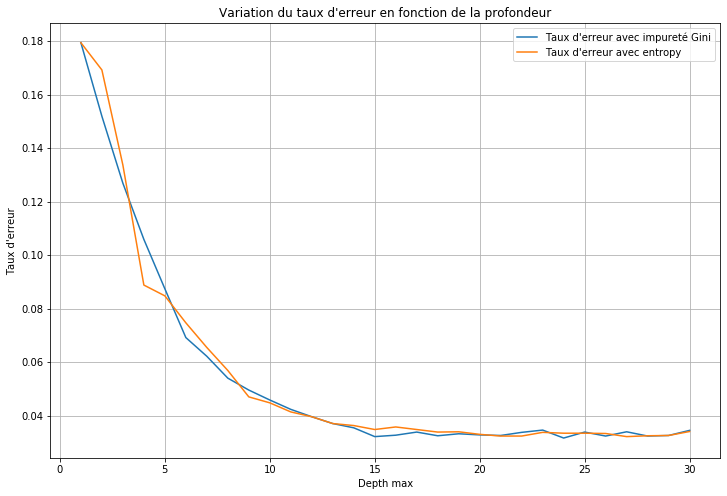

In [53]:
decisionTree(X_train_gr_sp, X_test_gr_sp, y_train_gr_sp, y_test_gr_sp)

#### Décision Tree ['GR','CAL','DCOR','DENS','PHIN','RESD','RESM,SP','PE']

In [54]:
data_geox_ml_gr_pe = pd.DataFrame(data_geox_ml[(data_geox_ml['GR'].isna() != True) & (data_geox_ml['CAL'].isna() != True) & (data_geox_ml['DCOR'].isna() != True) & (data_geox_ml['DENS'].isna() != True) & (data_geox_ml['PHIN'].isna() != True) & (data_geox_ml['RESD'].isna() != True) & (data_geox_ml['RESM'].isna() != True) & (data_geox_ml['SP'].isna() != True) & (data_geox_ml['PE'].isna() != True)], columns=['GR','CAL','DCOR','DENS','PHIN','RESD','RESM','SP', 'PE','LITHO'])

In [55]:
data_geox_ml_gr_pe.groupby(['LITHO']).count()

,GR,CAL,DCOR,DENS,PHIN,RESD,RESM,SP,PE
LITHO,,,,,,,,,
0,14212,14212,14212,14212,14212,14212,14212,14212,14212
1,6469,6469,6469,6469,6469,6469,6469,6469,6469


In [56]:
col_x = ['GR','CAL','DCOR','DENS','PHIN','RESD','RESM','SP','PE']
X_train_gr_pe, X_test_gr_pe, y_train_gr_pe, y_test_gr_pe = model_selection.train_test_split(data_geox_ml_gr_pe[col_x],data_geox_ml_gr_pe['LITHO'], test_size=0.2)

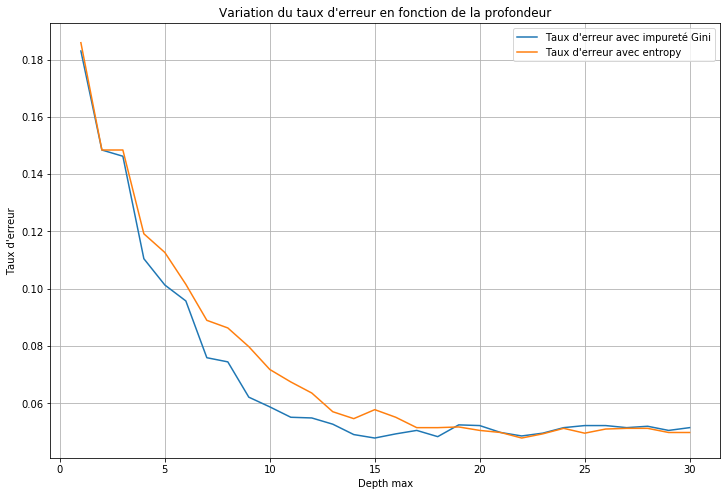

In [57]:
decisionTree(X_train_gr_pe, X_test_gr_pe, y_train_gr_pe, y_test_gr_pe)

#### Decision Tree suite à importance Random Forest ['GR, 'RESD', 'RESM', 'SP']

In [81]:
data_geox_ml_rimp= pd.DataFrame(data_geox_ml[(data_geox_ml['GR'].isna() != True) & (data_geox_ml['RESD'].isna() != True) & (data_geox_ml['RESM'].isna() != True) & (data_geox_ml['SP'].isna() != True)], columns=['GR','RESD','RESM','SP','LITHO'])

In [82]:
data_geox_ml_rimp.groupby(['LITHO']).count()

,GR,RESD,RESM,SP
LITHO,,,,
0,69372,69372,69372,69372
1,32100,32100,32100,32100


In [83]:
col_x = ['GR','RESD','RESM','SP']
X_train_rimp, X_test_rimp, y_train_rimp, y_test_rimp = model_selection.train_test_split(data_geox_ml_rimp[col_x],data_geox_ml_rimp['LITHO'], test_size=0.2)

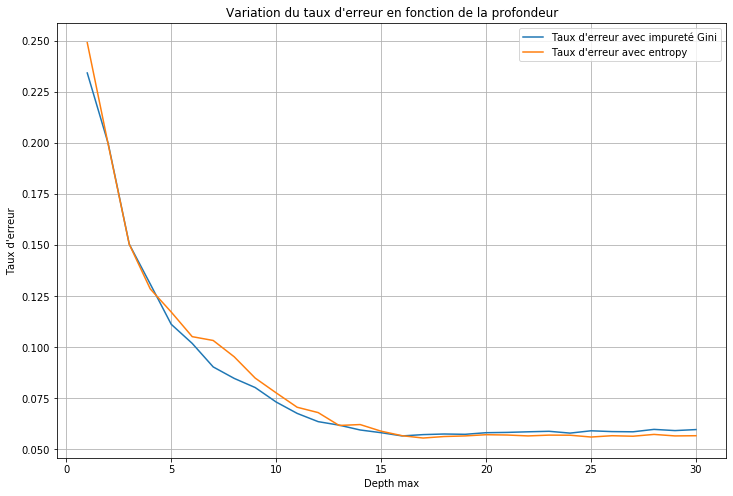

In [84]:
decisionTree(X_train_rimp, X_test_rimp, y_train_rimp, y_test_rimp)

#### Random Forest

In [67]:
def RandomForest(X_train, X_test, y_train, y_test): 
    max_depth = 30
    trees = []
    scores_gini = []
    scores_ent = []
    for i in range(max_depth):
        random_1 = RandomForestClassifier(max_depth=i+1, criterion='gini')
        random_1.fit(X_train, y_train)
        scores_gini.append(1 - random_1.score(X_test, y_test))

        random_2 = RandomForestClassifier(max_depth=i+1, criterion='entropy')
        random_2.fit(X_train, y_train)
        scores_ent.append(1 - random_2.score(X_test, y_test))

    plt.figure(figsize=(12,8))
    plt.plot(np.arange(max_depth) + 1, scores_gini, label="Taux d'erreur avec impureté Gini") 
    plt.plot(np.arange(max_depth) + 1, scores_ent, label="Taux d'erreur avec entropy") 
    plt.xlabel('Depth max')
    plt.ylabel("Taux d'erreur")
    plt.title("Variation du taux d'erreur en fonction de la profondeur")
    plt.legend()
    plt.grid()
    plt.show()

/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/parfait/anaconda3/lib/python3.7/si

/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/parfait/anaconda3/lib/python3.7/si

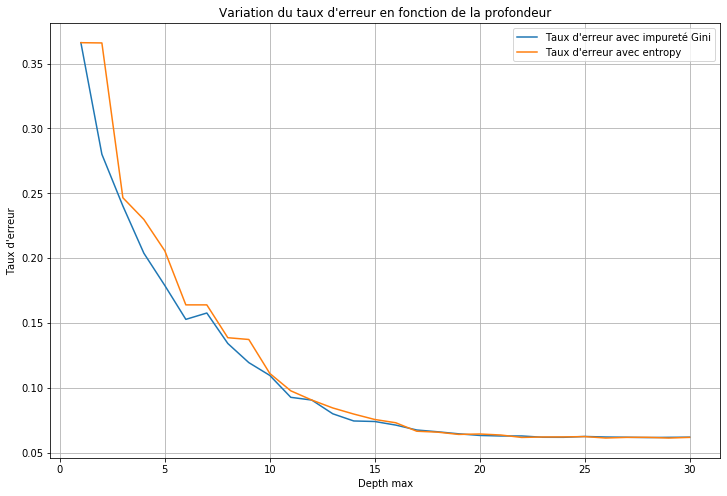

In [77]:
RandomForest(X_train, X_test, y_train, y_test)

In [78]:
random_for = RandomForestClassifier(max_depth=15, criterion='gini')
random_for.fit(X_train, y_train)

/home/parfait/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
print(random_for.feature_importances_)

[0.24336854 0.07483739 0.0512768  0.02373751 0.07682973 0.02498104
 0.12852257 0.10972729 0.09439509 0.02582418 0.01936569 0.12713419]
